Context
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset
focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this
kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the
movie industry, and get answers.

Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released: release date (YYYY-MM-DD)

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

Acknowledgements
This data was scraped from IMDb.

Contribute
You can contribute via GitHub.

Link to my github: https://github.com/Andasbek/my_portfolio

In [3]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] == (12, 16) # Adjust the configuration of the plots we will create

False

In [4]:
# Read in the data

df = pd.read_csv("movies.csv")

In [5]:
df.shape

(7668, 15)

In [6]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Let's see if there is any missing data

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {round(pct_missing, 2)}%")

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.28%
gross - 0.02%
company - 0.0%
runtime - 0.0%


In [9]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<Axes: >

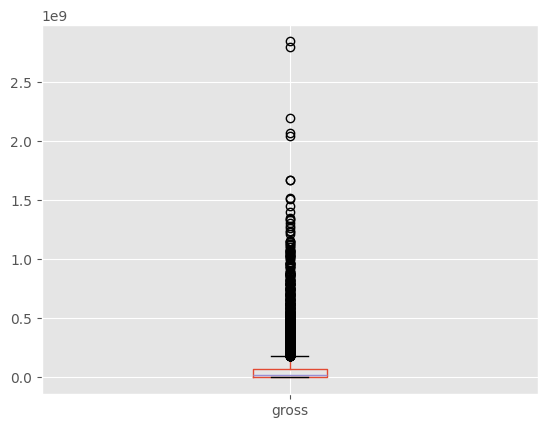

In [10]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [11]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
# change data type of columns

df["budget"] = pd.to_numeric(df["budget"], errors="coerce").fillna(0).astype(int)

df["gross"] = pd.to_numeric(df["gross"], errors="coerce").fillna(0).astype(int)


In [13]:
# Create correct Year column

df["year_correct"] = df["released"].astype(str).str.split().str[2]

In [14]:
df.sort_values(by=["gross"], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019
6644,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141.0,2015
7247,Black Panther,PG-13,Action,2018,"February 16, 2018 (United States)",7.3,661000.0,Ryan Coogler,Ryan Coogler,Chadwick Boseman,United States,200000000,1347597973,Marvel Studios,134.0,2018
5845,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,2011,"July 15, 2011 (United States)",8.1,790000.0,David Yates,Steve Kloves,Daniel Radcliffe,United Kingdom,125000000,1342321665,Warner Bros.,130.0,2011


In [15]:
# pd.set_option("display.max_rows", None)

In [16]:
# Drop any duplicates

# df = df.drop_duplicates()

In [17]:
# Budget high correlation
# company high correlation

In [18]:
df['gross'] = df['gross'].apply(lambda x: abs(x) if x < 0 else x)

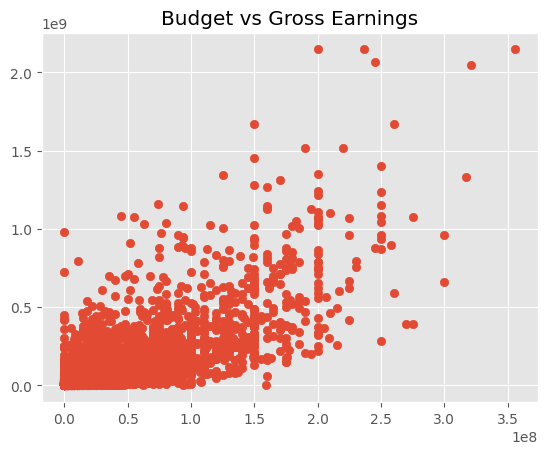

In [19]:
# Scatter plot with budget vs gross 

plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
# plt.xlavel("Gross Earnings")
# plt.ylavel("Budget")
plt.show()

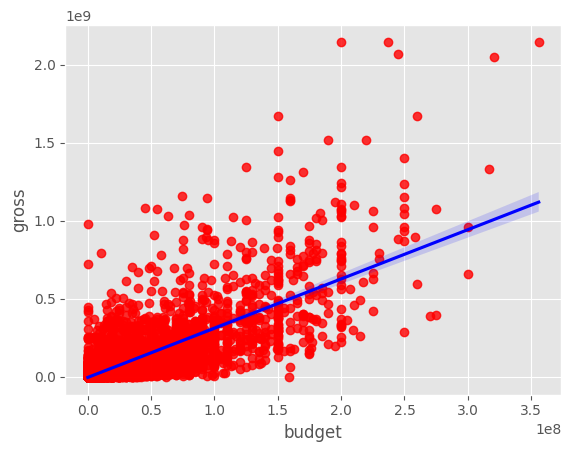

In [20]:
# Scatter plot with budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"});

In [21]:
# Let's start looking at correlation
df.corr(method="pearson", numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.264977,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.187530,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.637010,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.754893,0.269510
gross,0.264977,0.187530,0.637010,0.754893,1.000000,0.245376
runtime,0.120811,0.399451,0.309212,0.269510,0.245376,1.000000


In [22]:
df.corr(method="kendall", numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541955,0.176016
gross,0.216595,0.090626,0.560118,0.541955,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [23]:
df.corr(method="spearman", numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


In [24]:
# High correlation between budget and gross
# I was right

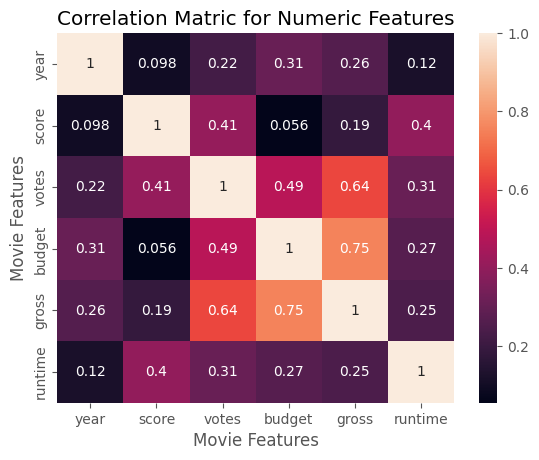

In [25]:
correlation_matrix = df.corr(method="pearson", numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matric for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [26]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'year_correct'],
      dtype='object')

In [27]:
box_office = df.groupby(["genre"]).agg({"gross":"sum"}).reset_index().sort_values(by="gross", ascending=True)

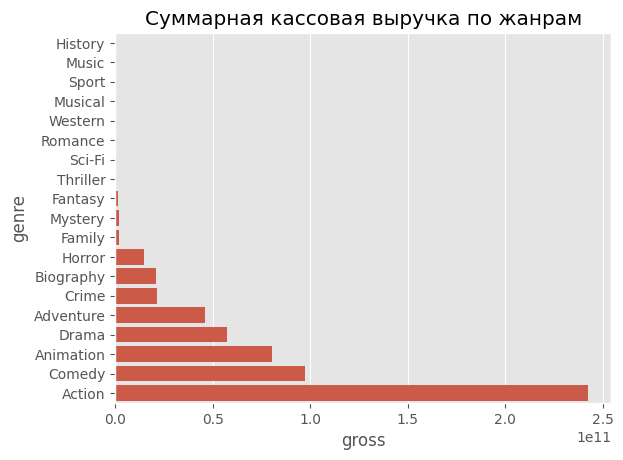

<Figure size 1600x1200 with 0 Axes>

In [28]:
sns.barplot(y=box_office["genre"], x=box_office["gross"])
plt.title('Суммарная кассовая выручка по жанрам')
plt.figure(figsize=(16, 12))
plt.show();

In [29]:
highest_grossing_director = df.groupby(["director"]).agg({"gross":"sum"}).reset_index().nlargest(10, "gross")

List of highest-grossing film directors

In [30]:
highest_grossing_director

,director,gross
2660,Steven Spielberg,9629049370
2193,Peter Jackson,6618045788
1886,Michael Bay,6451692798
162,Anthony Russo,6194231304
679,David Yates,6021591899
1155,James Cameron,5494162407
483,Christopher Nolan,5153547948
1125,J.J. Abrams,4659375464
2745,Tim Burton,4456348890
2432,Ron Howard,4409188200
